#**Frame Splitter**

In [ ]:
import cv2
import os
import numpy as np
from datetime import datetime

def split_and_process_video_as_numpy(video_paths, folder1, folder2, folder3, target_size=None, max_frames=None):
    # Ensure the folders exist
    os.makedirs(folder1, exist_ok=True)
    os.makedirs(folder2, exist_ok=True)
    os.makedirs(folder3, exist_ok=True)
    print("Directories exist!!!")

    for video_path in video_paths:
        # Open the video file
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error: Cannot open video {video_path}")
            continue

        total_frames_in_video = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        total_frames_to_process = min(total_frames_in_video, max_frames) if max_frames else total_frames_in_video
        print(f"Processing {video_path} with {total_frames_in_video} total frames. Target: {total_frames_to_process} frames.")

        frame_count = 0
        processed_frames = 0

        while processed_frames < total_frames_to_process:
            ret, frame = cap.read()
            if not ret:
                break  # End of video reached

            if frame is None or frame.size == 0:
                print(f"Empty frame encountered at index {frame_count} in {video_path}")
                frame_count += 1
                continue

            # Decode and normalize frame
            decoded_frame = frame.astype('float32') / (target_size[0] - 1)  # Normalize pixel values to [0, 1]

            # Resize frame if target size is provided
            if target_size:
                decoded_frame = cv2.resize(decoded_frame, target_size)

            print(f"Processing frame {frame_count} from {video_path}")
            # Generate a unique filename
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S_%f")
            video_name = os.path.splitext(os.path.basename(video_path))[0]  # Extract video name
            filename = f"{video_name}_frame_{frame_count}_{timestamp}.npy"  # Save as .npy file

            # Determine which folder to save the tensor in
            save_folder = (
                folder1 if frame_count % 3 == 0 else
                folder2 if frame_count % 3 == 1 else
                folder3
            )

            # Save the NumPy tensor to the appropriate folder
            save_path = os.path.join(save_folder, filename)
            np.save(save_path, decoded_frame)  # Save normalized frame as NumPy tensor

            frame_count += 1
            processed_frames += 1

        cap.release()
        print(f"Processing complete for {video_path}. Frames processed: {processed_frames}/{total_frames_to_process}")

# Usage
video_paths = [
      "Downloads/1.mp4",
      "Downloads/2.mp4",
      "Downloads/3.mp4",
      "Downloads/4.mp4",
      "Downloads/5.mp4",
      "Downloads/6.mp4",
      "Downloads/7.mp4",
      "Downloads/8.mp4",
      "Downloads/9.mp4",
      "Downloads/10.mp4",
      "Downloads/11.mp4",
      "Downloads/12.mp4",
      "Downloads/13.mp4",
      "Downloads/14.mp4",
      "Downloads/15.mp4",
      "Downloads/16.mp4",
      "Downloads/17.mp4",
      "Downloads/18.mp4",
      "Downloads/19.mp4",
      "Downloads/20.mp4",
      "Downloads/21.mp4",
      "Downloads/22.mp4",
      "Downloads/23.mp4",
      "Downloads/24.mp4",
      "Downloads/25.mp4",
      "Downloads/26.mp4",
      "Downloads/27.mp4",
      "Downloads/28.mp4",
      "Downloads/29.mp4",
      "Downloads/30.mp4",
      "Downloads/31.mp4",
      "Downloads/32.mp4",
      "Downloads/33.mp4",
      "Downloads/34.mp4",
      "Downloads/35.mp4",
      "Downloads/36.mp4",
      "Downloads/37.mp4",
      "Downloads/38.mp4",
      "Downloads/39.mp4",
      "Downloads/40.mp4",
      "Downloads/41.mp4",
      "Downloads/42.mp4",
      "Downloads/43.mp4",
      "Downloads/44.mp4"
]

folder1 = "Downloads/Frint_data-small/f1_decoded"
folder2 = "Downloads/Frint_data-small/fout_decoded"
folder3 = "Downloads/Frint_data-small/f2_decoded"
target_size = (256, 256)

max_frames = 54 #Prefer a multiple of 3 please

split_and_process_video_as_numpy(video_paths, folder1, folder2, folder3, target_size, max_frames)
print("All videos processed.")
print("-------------------------------------> Normalizing Factor =", target_size[0]-1, "<-------------------------------------")


Directories exist!!!
Processing Downloads/1.mp4 with 1248 total frames. Target: 54 frames.
Processing frame 0 from Downloads/1.mp4
Processing frame 1 from Downloads/1.mp4
Processing frame 2 from Downloads/1.mp4
Processing frame 3 from Downloads/1.mp4
Processing frame 4 from Downloads/1.mp4
Processing frame 5 from Downloads/1.mp4
Processing frame 6 from Downloads/1.mp4
Processing frame 7 from Downloads/1.mp4
Processing frame 8 from Downloads/1.mp4
Processing frame 9 from Downloads/1.mp4
Processing frame 10 from Downloads/1.mp4
Processing frame 11 from Downloads/1.mp4
Processing frame 12 from Downloads/1.mp4
Processing frame 13 from Downloads/1.mp4
Processing frame 14 from Downloads/1.mp4
Processing frame 15 from Downloads/1.mp4
Processing frame 16 from Downloads/1.mp4
Processing frame 17 from Downloads/1.mp4
Processing frame 18 from Downloads/1.mp4
Processing frame 19 from Downloads/1.mp4
Processing frame 20 from Downloads/1.mp4
Processing frame 21 from Downloads/1.mp4
Processing frame 

#**Clear The Dataset (Delete all Files)**

In [ ]:
import os

def clear_folders(*folders):
    for folder in folders:
        if os.path.exists(folder):
            for file in os.listdir(folder):
                file_path = os.path.join(folder, file)
                try:
                    if os.path.isfile(file_path) or os.path.islink(file_path):
                        os.unlink(file_path)  # Remove file or symlink
                    elif os.path.isdir(file_path):
                        os.rmdir(file_path)  # Remove empty directory
                except Exception as e:
                    print(f"Failed to delete {file_path}. Reason: {e}")
            print(f"Cleared all files in {folder}.")
        else:
            print(f"Folder {folder} does not exist.")

# Example usage
folder1 = "Downloads/Frint_data-small/f1_decoded"
folder2 = "Downloads/Frint_data-small/fout_decoded"
folder3 = "Downloads/Frint_data-small/f2_decoded"

clear_folders(folder1, folder2, folder3)


Cleared all files in Downloads/Frint_data-small/f1_decoded.
Cleared all files in Downloads/Frint_data-small/fout_decoded.
Cleared all files in Downloads/Frint_data-small/f2_decoded.


#**Data Loading Function**

In [ ]:
import numpy as np
import os

def load_tensors(folder1, folder2, folder3):
    # Helper function to load all .npy files from a folder
    def load_folder(folder):
        tensors = []
        for file in sorted(os.listdir(folder)):  # Sort to maintain consistent order
            if file.endswith(".npy"):
                tensor = np.load(os.path.join(folder, file))
                tensors.append(tensor)
        return np.array(tensors)

    # Load tensors from each folder
    print(f"Loading tensors from {folder1} into X1...")
    X1 = load_folder(folder1)
    print(f"Loading tensors from {folder2} into X2...")
    X2 = load_folder(folder2)
    print(f"Loading tensors from {folder3} into Y...")
    Y = load_folder(folder3)

    print(f"Loaded tensors: X1 ({X1.shape}), X2 ({X2.shape}), Y ({Y.shape})")
    return X1, X2, Y


In [ ]:
import os
import math
import numpy as np
import tensorflow as tf

def normalize_images(images):
    # Normalize pixel values to [0, 1]
    return images / 255.0

def load_images_from_directory(directory_path, target_size=(256, 256)):
    images = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            try:
                file_path = os.path.join(directory_path, file_name)
                image = tf.io.read_file(file_path)
                image = tf.image.decode_image(image, channels=3)
                image = tf.image.resize(image, target_size)
                image = normalize_images(image)  # Normalize the image
                images.append(image.numpy())
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")
    return np.array(images)


def load_data(f1, f2, fout):
    X1 = load_images_from_directory(f1)
    X2 = load_images_from_directory(f2)
    Y = load_images_from_directory(fout)
    if len(X1) != len(X2) or len(X1) != len(Y):
        raise ValueError("The number of images in the directories does not match.")
    print(f"X1 shape: {X1.shape}, X2 shape: {X2.shape}, Y shape: {Y.shape}")

    return X1, X2, Y

#**Loss Function**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, DenseNet121
from tensorflow.keras import backend as K

# SSIM Loss
def ssim_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    ssim_value = tf.image.ssim(y_true, y_pred, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
    return 1 - tf.reduce_mean(ssim_value)

# MSE Loss
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# VGG19 Perceptual Loss
vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))  # Pretrained VGG19
vgg_model.trainable = False  # Freeze the VGG model

def vgg_perceptual_loss(y_true, y_pred):
    # Ensure inputs are properly scaled for VGG (range [0, 255])
    y_true_vgg = tf.image.resize(y_true, (224, 224)) * 255.0  # Resize to VGG's input size
    y_pred_vgg = tf.image.resize(y_pred, (224, 224)) * 255.0

    # Extract features using VGG19
    vgg_features_true = vgg_model(y_true_vgg)
    vgg_features_pred = vgg_model(y_pred_vgg)

    # Compute perceptual loss as MSE between extracted features
    return tf.reduce_mean(tf.square(vgg_features_true - vgg_features_pred))

# DenseNet Perceptual Loss
densenet_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))  # Pretrained DenseNet
densenet_model.trainable = False  # Freeze the DenseNet model

def densenet_perceptual_loss(y_true, y_pred):
    # Ensure inputs are properly scaled for DenseNet (range [0, 255])
    y_true_dn = tf.image.resize(y_true, (224, 224)) * 255.0  # Resize to DenseNet's input size
    y_pred_dn = tf.image.resize(y_pred, (224, 224)) * 255.0

    # Extract features using DenseNet
    dn_features_true = densenet_model(y_true_dn)
    dn_features_pred = densenet_model(y_pred_dn)

    # Compute perceptual loss as MSE between extracted features
    return tf.reduce_mean(tf.square(dn_features_true - dn_features_pred))

# Total Variation Loss
def total_variation_loss(y_pred):
    return tf.reduce_mean(K.abs(y_pred[:, 1:, :, :] - y_pred[:, :-1, :, :])) + \
           tf.reduce_mean(K.abs(y_pred[:, :, 1:, :] - y_pred[:, :, :-1, :]))

# Combined Loss
def combined_loss(y_true, y_pred, lambda_mse=1.0, lambda_ssim=1.0, lambda_vgg=1.0, lambda_dn=1.0, lambda_tv=0.0):
    # Calculate individual losses
    loss_mse = mse_loss(y_true, y_pred)
    loss_ssim = ssim_loss(y_true, y_pred)
    loss_vgg = vgg_perceptual_loss(y_true, y_pred)
    loss_dn = densenet_perceptual_loss(y_true, y_pred)
    loss_tv = total_variation_loss(y_pred)

    loss_mse = tf.cast(loss_mse, tf.float32)
    loss_ssim = tf.cast(loss_ssim, tf.float32)
    loss_vgg = tf.cast(loss_vgg, tf.float32)
    loss_dn = tf.cast(loss_dn, tf.float32)
    loss_tv = tf.cast(loss_tv, tf.float32)

    # Combine losses with weights
    total_loss = lambda_mse * loss_mse + lambda_ssim * loss_ssim + lambda_vgg * loss_vgg + lambda_dn * loss_dn + lambda_tv * loss_tv
    return total_loss


29084464/29084464 [==============================] - 9s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import backend as K

# SSIM Loss
def ssim_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    ssim_value = tf.image.ssim(y_true, y_pred, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
    return 1 - tf.reduce_mean(ssim_value)

# MSE Loss
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# VGG19 Perceptual Loss
vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=(None, None, 3))  # Pretrained VGG19
vgg_model.trainable = False  # Freeze the VGG model

def vgg_perceptual_loss(y_true, y_pred):
    # Ensure inputs are properly scaled for VGG (range [0, 255])
    y_true_vgg = tf.image.resize(y_true, (224, 224)) * 255.0  # Resize to VGG's input size
    y_pred_vgg = tf.image.resize(y_pred, (224, 224)) * 255.0

    # Extract features using VGG19
    vgg_features_true = vgg_model(y_true_vgg)
    vgg_features_pred = vgg_model(y_pred_vgg)

    # Compute perceptual loss as MSE between extracted features
    return tf.reduce_mean(tf.square(vgg_features_true - vgg_features_pred))

# Total Variation Loss
def total_variation_loss(y_pred):
    return tf.reduce_mean(K.abs(y_pred[:, 1:, :, :] - y_pred[:, :-1, :, :])) + \
           tf.reduce_mean(K.abs(y_pred[:, :, 1:, :] - y_pred[:, :, :-1, :]))

# Combined Loss
def combined_loss(y_true, y_pred, lambda_mse=1.0, lambda_ssim=1.0, lambda_vgg=1.0, lambda_tv=0.0):

    # Calculate individual losses
    loss_mse = mse_loss(y_true, y_pred)
    loss_ssim = ssim_loss(y_true, y_pred)
    loss_vgg = vgg_perceptual_loss(y_true, y_pred)
    loss_tv = total_variation_loss(y_pred)

    loss_mse = tf.cast(loss_mse, tf.float32)
    loss_ssim = tf.cast(loss_ssim, tf.float32)
    loss_vgg = tf.cast(loss_vgg, tf.float32)
    loss_tv = tf.cast(loss_tv, tf.float32)

    # Combine losses with weights
    total_loss = lambda_mse * loss_mse + lambda_ssim * loss_ssim + lambda_vgg * loss_vgg + lambda_tv * loss_tv
    return total_loss

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import backend as K
import tensorflow_addons as tfa

def ssim_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    ssim_value = tf.image.ssim(y_true, y_pred, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
    return 1 - tf.reduce_mean(ssim_value)

def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Load VGG19 model pre-trained on ImageNet (create it once)
vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=(None, None, 3))

def vgg_perceptual_loss(y_true, y_pred):
    # We will use the output of the last convolutional layer for perceptual loss
    vgg_features_true = vgg_model(y_true)
    vgg_features_pred = vgg_model(y_pred)

    # Perceptual loss is the mean squared error between feature activations
    return tf.reduce_mean(tf.square(vgg_features_true - vgg_features_pred))

def total_variation_loss(y_true, y_pred):
    return tf.reduce_mean(K.abs(y_pred[:, 1:, :, :] - y_pred[:, :-1, :, :])) + \
           tf.reduce_mean(K.abs(y_pred[:, :, 1:, :] - y_pred[:, :, :-1, :]))

def combined_loss5(y_true, y_pred, lambda_mse=1.0, lambda_ssim=1.0, lambda_vgg=1.0, lambda_tv=0.0):
    # Calculate individual losses
    loss_mse = mse_loss(y_true, y_pred)
    loss_ssim = ssim_loss(y_true, y_pred)
    loss_vgg = vgg_perceptual_loss(y_true, y_pred)
    loss_tv = total_variation_loss(y_true, y_pred)

    # Combine losses with weights
    total_loss = lambda_mse * loss_mse + lambda_ssim * loss_ssim + lambda_vgg * loss_vgg + lambda_tv * loss_tv
    return total_loss


TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.losses import MeanSquaredError


# Define a combined loss
def combined_loss3(y_true, y_pred):
    # Pixel-wise MSE
    mse = tf.reduce_mean(tf.square(y_true - y_pred))

    # Perceptual loss
    y_true_features = vgg(y_true)
    y_pred_features = vgg(y_pred)
    perceptual = tf.reduce_mean(tf.square(y_true_features - y_pred_features))

    # Weighted sum
    return mse + 0.1 * perceptual


#**Imports and Model Definition**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, DepthwiseConv2D, Conv2DTranspose, Dense, GlobalAveragePooling2D,
    UpSampling2D, BatchNormalization, Concatenate, Add, Reshape, Dropout, LayerNormalization, MaxPooling2D, Multiply
)
from tensorflow.keras.models import Model
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam

# Custom WarpLayer to handle dense_image_warp
class WarpLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(WarpLayer, self).__init__(**kwargs)

    def call(self, inputs):
        frame, flow = inputs
        return tfa.image.dense_image_warp(frame, flow)

# Self-Attention Block with Dense Layers
def self_attention_block(x):
    # Query
    query = Conv2D(filters=x.shape[-1], kernel_size=3, padding='same', activation='relu')(x)
    query = Dense(units=x.shape[-1], activation='relu')(query)
    query = Conv2D(filters=x.shape[-1], kernel_size=3, padding='same')(query)

    # Key
    key = Conv2D(filters=x.shape[-1], kernel_size=3, padding='same', activation='relu')(x)
    key = Dense(units=x.shape[-1], activation='relu')(key)
    key = Conv2D(filters=x.shape[-1], kernel_size=3, padding='same')(key)

    # Value
    value = Conv2D(filters=x.shape[-1], kernel_size=3, padding='same', activation='relu')(x)
    value = Dense(units=x.shape[-1], activation='relu')(value)
    value = Conv2D(filters=x.shape[-1], kernel_size=3, padding='same')(value)

    # Attention mechanism
    attention = tf.keras.layers.Attention()([query, value, key])
    attention = LayerNormalization(epsilon=1e-6)(attention)

    # Residual connection
    return Add()([x, attention])

# Depthwise Separable Residual Block with Squeeze-and-Excitation
def residual_block(x, filters):
    shortcut = x
    if x.shape[-1] != filters:  # Match dimensions if necessary
        shortcut = Conv2D(filters, (1, 1), padding='same')(x)
    res = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    res = Conv2D(filters, (1, 1), padding='same')(res)
    res = tf.keras.layers.GlobalAveragePooling2D()(res)
    res = Dense(filters // 4, activation='relu')(res)
    res = Dense(filters, activation='sigmoid')(res)
    res = Reshape((1, 1, filters))(res)

    # Ensure shapes are compatible
    res = tf.image.resize(res, tf.shape(shortcut)[1:3])
    res = Multiply()([res, shortcut])
    return Add()([shortcut, res])

# Feature extractor
def feature_extractor(x, filters):
    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    return x

# Optical Flow Estimation with a real model
def optical_flow_estimation(input1, input2):
    combined_frames = Concatenate()([input1, input2])
    flow = Conv2D(64, (3, 3), padding='same', activation='relu')(combined_frames)  # Increased filters for quality
    flow = residual_block(flow, filters=64)
    flow = Conv2D(2, (3, 3), padding='same', activation='tanh', name='optical_flow')(flow)

    # Use the custom WarpLayer for warping
    warped_frame = WarpLayer()([input1, flow])

    return flow, warped_frame

# Main Model Creation Function
def FRINT():
    input_frame1 = Input(shape=(None, None, 3))  # Dynamic input size
    input_frame2 = Input(shape=(None, None, 3))  # Dynamic input size

    # Optical Flow Estimation and Warping
    optical_flow, warped_frame = optical_flow_estimation(input_frame1, input_frame2)

    # Combine inputs, optical flow, and warped frame
    combined = Concatenate()([input_frame1, input_frame2, optical_flow, warped_frame])
    combined = self_attention_block(combined)

    # Enhanced Motion Estimation with residual blocks
    flow = residual_block(combined, filters=64)
    flow = residual_block(flow, filters=128)
    motion_features = Conv2D(3, (3, 3), padding='same', activation='sigmoid', name='motion_flow')(flow)

    # Multi-scale feature extraction
    features_1 = feature_extractor(combined, filters=64)
    features_2 = feature_extractor(MaxPooling2D(pool_size=(2, 2))(features_1), filters=128)
    features_3 = feature_extractor(MaxPooling2D(pool_size=(2, 2))(features_2), filters=256)

    # Upsample and merge features
    upsampled_2 = UpSampling2D(size=(2, 2), interpolation='bilinear')(features_3)
    merge_2 = Concatenate()([features_2, tf.image.resize(upsampled_2, tf.shape(features_2)[1:3])])

    upsampled_1 = UpSampling2D(size=(2, 2), interpolation='bilinear')(merge_2)
    merge_1 = Concatenate()([features_1, tf.image.resize(upsampled_1, tf.shape(features_1)[1:3])])

    # Flatten and dense perceptron layers
    flattened = GlobalAveragePooling2D()(merge_1)

    dense_1 = Dense(512, activation='relu')(flattened)
    dense_2 = Dense(128, activation='relu')(dense_1)
    dropout_1 = Dropout(0.5)(dense_2)

    dense_3 = Dense(256, activation='relu')(dropout_1)
    dense_4 = Dense(512, activation='relu')(dense_3)
    dropout_2 = Dropout(0.5)(dense_4)

    dense_5 = Dense(1024, activation='relu')(dropout_2)

    # Reshape and upsample expanded dense features to match the spatial dimensions
    expanded = Dense(32 * 32, activation='relu')(dense_5)  # Expand to 32x32
    expanded = Reshape((32, 32, 1))(expanded)  # Reshape to spatial dimensions
    expanded = UpSampling2D(size=(8, 8), interpolation='bilinear')(expanded)  # Upsample to match input size

    # Concatenate refined features with expanded dense features
    refined = Concatenate()([merge_1, expanded])  # Combine refined spatial and dense features
    refined = Conv2DTranspose(64, (3, 3), padding='same', activation='relu')(refined)

    # Final output layer
    output = Conv2D(filters=3, kernel_size=(3, 3), padding='same', activation='sigmoid')(refined)

    # Define model
    model = Model(inputs=[input_frame1, input_frame2], outputs=output)

    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss=combined_loss)  # Use combined_loss as specified
    model.summary()

    return model


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, DepthwiseConv2D, Conv2DTranspose, Dense, GlobalAveragePooling2D,
    UpSampling2D, BatchNormalization, Concatenate, Add, Reshape, Dropout, LayerNormalization, MaxPooling2D, Multiply
)
from tensorflow.keras.models import Model
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam

# Custom WarpLayer to handle dense_image_warp
class WarpLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(WarpLayer, self).__init__(**kwargs)

    def call(self, inputs):
        frame, flow = inputs
        return tfa.image.dense_image_warp(frame, flow)

# Self-Attention Block
def self_attention_block(x):
    query = Conv2D(filters=x.shape[-1], kernel_size=1, padding='same')(x)
    key = Conv2D(filters=x.shape[-1], kernel_size=1, padding='same')(x)
    value = Conv2D(filters=x.shape[-1], kernel_size=1, padding='same')(x)

    attention = tf.keras.layers.Attention()([query, value, key])
    attention = LayerNormalization(epsilon=1e-6)(attention)
    return Add()([x, attention])

# Depthwise Separable Residual Block with Squeeze-and-Excitation
def residual_block(x, filters):
    shortcut = x
    if x.shape[-1] != filters:  # Match dimensions if necessary
        shortcut = Conv2D(filters, (1, 1), padding='same')(x)
    res = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    res = Conv2D(filters, (1, 1), padding='same')(res)
    res = tf.keras.layers.GlobalAveragePooling2D()(res)
    res = Dense(filters // 4, activation='relu')(res)
    res = Dense(filters, activation='sigmoid')(res)
    res = Reshape((1, 1, filters))(res)

    # Ensure shapes are compatible
    res = tf.image.resize(res, tf.shape(shortcut)[1:3])
    res = Multiply()([res, shortcut])
    return Add()([shortcut, res])

# Feature extractor
def feature_extractor(x, filters):
    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    return x

# Optical Flow Estimation with a real model
def optical_flow_estimation(input1, input2):
    combined_frames = Concatenate()([input1, input2])
    flow = Conv2D(64, (3, 3), padding='same', activation='relu')(combined_frames)  # Increased filters for quality
    flow = residual_block(flow, filters=64)
    flow = Conv2D(2, (3, 3), padding='same', activation='tanh', name='optical_flow')(flow)

    # Use the custom WarpLayer for warping
    warped_frame = WarpLayer()([input1, flow])

    return flow, warped_frame

# Main Model Creation Function
def FRINT():
    input_frame1 = Input(shape=(None, None, 3))  # Dynamic input size
    input_frame2 = Input(shape=(None, None, 3))  # Dynamic input size

    # Optical Flow Estimation and Warping
    optical_flow, warped_frame = optical_flow_estimation(input_frame1, input_frame2)

    # Combine inputs, optical flow, and warped frame
    combined = Concatenate()([input_frame1, input_frame2, optical_flow, warped_frame])
    combined = self_attention_block(combined)

    # Enhanced Motion Estimation with residual blocks
    flow = residual_block(combined, filters=64)
    flow = residual_block(flow, filters=128)
    motion_features = Conv2D(3, (3, 3), padding='same', activation='sigmoid', name='motion_flow')(flow)

    # Multi-scale feature extraction
    features_1 = feature_extractor(combined, filters=64)
    features_2 = feature_extractor(MaxPooling2D(pool_size=(2, 2))(features_1), filters=128)
    features_3 = feature_extractor(MaxPooling2D(pool_size=(2, 2))(features_2), filters=256)

    # Upsample and merge features
    upsampled_2 = UpSampling2D(size=(2, 2), interpolation='bilinear')(features_3)
    merge_2 = Concatenate()([features_2, tf.image.resize(upsampled_2, tf.shape(features_2)[1:3])])

    upsampled_1 = UpSampling2D(size=(2, 2), interpolation='bilinear')(merge_2)
    merge_1 = Concatenate()([features_1, tf.image.resize(upsampled_1, tf.shape(features_1)[1:3])])

    # Flatten and dense perceptron layers
    flattened = GlobalAveragePooling2D()(merge_1)

    dense_1 = Dense(512, activation='relu')(flattened)
    dense_2 = Dense(128, activation='relu')(dense_1)
    dropout_1 = Dropout(0.5)(dense_2)

    dense_3 = Dense(256, activation='relu')(dropout_1)
    dense_4 = Dense(512, activation='relu')(dense_3)
    dropout_2 = Dropout(0.5)(dense_4)

    dense_5 = Dense(1024, activation='relu')(dropout_2)

    # Reshape and upsample expanded dense features to match the spatial dimensions
    expanded = Dense(32 * 32, activation='relu')(dense_5)  # Expand to 32x32
    expanded = Reshape((32, 32, 1))(expanded)  # Reshape to spatial dimensions
    expanded = UpSampling2D(size=(8, 8), interpolation='bilinear')(expanded)  # Upsample to match input size

    # Concatenate refined features with expanded dense features
    refined = Concatenate()([merge_1, expanded])  # Combine refined spatial and dense features
    refined = Conv2DTranspose(64, (3, 3), padding='same', activation='relu')(refined)

    # Final output layer
    output = Conv2D(filters=3, kernel_size=(3, 3), padding='same', activation='sigmoid')(refined)

    # Define model
    model = Model(inputs=[input_frame1, input_frame2], outputs=output)

    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss=combined_loss)  # Use combined_loss as specified
    model.summary()

    return model


C:\Users\dedeep vasireddy\.conda\envs\AIML\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\dedeep vasireddy\.conda\envs\AIML\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file a

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, DepthwiseConv2D, Conv2DTranspose, Dense, GlobalAveragePooling2D,
    UpSampling2D, BatchNormalization, Concatenate, Add, Reshape,
    AveragePooling2D, Attention, Dropout
)
from tensorflow.keras.models import Model
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam

# Custom WarpLayer to handle dense_image_warp
class WarpLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(WarpLayer, self).__init__(**kwargs)

    def call(self, inputs):
        frame, flow = inputs
        return tfa.image.dense_image_warp(frame, flow)

# Lightweight Attention Block
def attention_block(x):
    attn_output = Attention()([x, x])
    attn_output = BatchNormalization()(attn_output)
    return Add()([x, attn_output])

# Depthwise Separable Residual Block
def residual_block(x, filters):
    shortcut = x
    if x.shape[-1] != filters:  # Match dimensions if necessary
        shortcut = Conv2D(filters, (1, 1), padding='same')(x)
    res = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    res = Conv2D(filters, (1, 1), padding='same')(res)
    return Add()([shortcut, res])

# Feature extractor
def feature_extractor(x, filters):
    x = DepthwiseConv2D((3, 3), padding='same', activation='relu')(x)
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    return x

# Optical Flow Estimation with a real model
def optical_flow_estimation(input1, input2):
    combined_frames = Concatenate()([input1, input2])
    flow = Conv2D(32, (3, 3), padding='same', activation='relu')(combined_frames)  # Reduced filters for efficiency
    flow = residual_block(flow, filters=32)
    flow = Conv2D(2, (3, 3), padding='same', activation='tanh', name='optical_flow')(flow)

    # Use the custom WarpLayer for warping
    warped_frame = WarpLayer()([input1, flow])

    return flow, warped_frame

# Custom layer for conditional average pooling
class ConditionalAveragePooling2D(tf.keras.layers.Layer):
    def __init__(self, pool_size=(2, 2), **kwargs):
        super(ConditionalAveragePooling2D, self).__init__(**kwargs)
        self.pool_size = pool_size
        self.pooling = AveragePooling2D(pool_size=pool_size)

    def call(self, inputs):
        shape = tf.shape(inputs)
        condition = tf.logical_and(shape[1] >= self.pool_size[0], shape[2] >= self.pool_size[1])

        def apply_pooling():
            return self.pooling(inputs)

        def skip_pooling():
            return inputs

        return tf.cond(condition, apply_pooling, skip_pooling)

# Main Model Creation Function
def FRINT():
    input_frame1 = Input(shape=(None, None, 3))  # Dynamic input size
    input_frame2 = Input(shape=(None, None, 3))  # Dynamic input size

    # Optical Flow Estimation and Warping
    optical_flow, warped_frame = optical_flow_estimation(input_frame1, input_frame2)

    # Combine inputs, optical flow, and warped frame
    combined = Concatenate()([input_frame1, input_frame2, optical_flow, warped_frame])
    combined = attention_block(combined)

    # Enhanced Motion Estimation with residual blocks
    flow = residual_block(combined, filters=32)
    flow = residual_block(flow, filters=64)
    flow = residual_block(flow, filters=128)
    flow = residual_block(flow, filters=64)
    flow = residual_block(flow, filters=32)
    motion_features = Conv2D(3, (3, 3), padding='same', activation='sigmoid', name='motion_flow')(flow)

    # Multi-scale feature extraction
    features_1 = feature_extractor(combined, filters=32)
    features_2 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(features_1), filters=64)
    features_3 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(features_2), filters=128)
    features_4 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(features_3), filters=256)
    features_5 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(features_4), filters=512)

    dropout_A = Dropout(0.5)(features_5)

    features_6 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(dropout_A), filters=1024)
    features_7 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(features_6), filters=64)
    features_8 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(features_7), filters=32)

    dropout_B = Dropout(0.5)(features_8)

    features_9 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(dropout_B), filters=16)
    features_10 = feature_extractor(ConditionalAveragePooling2D(pool_size=(2, 2))(features_9), filters=8)

    # Upsample and merge features
    upsampled_3 = UpSampling2D(size=(2, 2), interpolation='bilinear')(features_10)
    merge_3 = Concatenate()([features_3, tf.image.resize(upsampled_3, tf.shape(features_3)[1:3])])

    upsampled_2 = UpSampling2D(size=(2, 2), interpolation='bilinear')(merge_3)
    merge_2 = Concatenate()([features_2, tf.image.resize(upsampled_2, tf.shape(features_2)[1:3])])

    upsampled_1 = UpSampling2D(size=(2, 2), interpolation='bilinear')(merge_2)
    merge_1 = Concatenate()([features_1, tf.image.resize(upsampled_1, tf.shape(features_1)[1:3])])

    # Flatten and dense perceptron layers
    flattened = GlobalAveragePooling2D()(merge_1)

    dense_1 = Dense(512, activation='relu')(flattened)
    dense_2 = Dense(64, activation='relu')(dense_1)

    dropout_1 = Dropout(0.5)(dense_2)

    dense_3 = Dense(128, activation='relu')(dropout_1)
    dense_4 = Dense(256, activation='relu')(dense_3)

    dropout_2 = Dropout(0.5)(dense_4)

    dense_5 = Dense(256, activation='relu')(dropout_2)

    # Reshape and upsample expanded dense features to match the spatial dimensions
    expanded = Dense(32 * 32, activation='relu')(dense_5)  # Expand to 32x32
    expanded = Reshape((32, 32, 1))(expanded)  # Reshape to spatial dimensions
    expanded = UpSampling2D(size=(8, 8), interpolation='bilinear')(expanded)  # Upsample to match input size

    # Concatenate refined features with expanded dense features
    refined = Concatenate()([merge_1, expanded])  # Combine refined spatial and dense features
    refined = Conv2DTranspose(32, (3, 3), padding='same', activation='relu')(refined)

    # Final output layer
    output = Conv2D(filters=3, kernel_size=(3, 3), padding='same', activation='sigmoid')(refined)

    # Define model
    model = Model(inputs=[input_frame1, input_frame2], outputs=output)

    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss=combined_loss)  # Use appropriate loss
    model.summary()

    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, Conv2DTranspose, Concatenate, Dropout, Add, AveragePooling2D,
    UpSampling2D, BatchNormalization, ReLU, Layer
)
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa  # For bilinear warping

# Residual block definition
def residual_block(x, filters, kernel_size=3):
    shortcut = x
    if x.shape[-1] != filters:  # Match dimensions if necessary
        shortcut = Conv2D(filters, (1, 1), padding='same')(x)
    x = Conv2D(filters, kernel_size, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    return Add()([shortcut, x])  # Residual connection

# Feature extractor
def feature_extractor(x, filters):
    projection = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', padding='same')(x)
    conv1 = Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', padding='same')(x)
    conv2 = Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', padding='same')(conv1)
    return Add()([projection, conv2])  # Residual connection

# Custom WarpLayer to handle dense_image_warp
class WarpLayer(Layer):
    def __init__(self, **kwargs):
        super(WarpLayer, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        frame, flow = inputs
        return tfa.image.dense_image_warp(frame, flow)

# Warp frame using optical flow
def warp_frame(frame, flow):
    warp_layer = WarpLayer()
    return warp_layer([frame, flow])

# Optical Flow Estimation with Warping
def optical_flow_estimation(input_frame1, input_frame2):
    combined_frames = Concatenate()([input_frame1, input_frame2])
    flow = Conv2D(64, (3, 3), activation='relu', padding='same')(combined_frames)
    flow = residual_block(flow, filters=64)
    flow = Conv2D(2, (3, 3), activation='tanh', padding='same', name='optical_flow')(flow)  # Output flow map (dx, dy)
    warped_frame = warp_frame(input_frame1, flow)  # Warp frame1 using flow
    return flow, warped_frame

# Create the advanced frame interpolation model
def create_advanced_FRINT():
    input_frame1 = Input(shape=(None, None, 3))  # Flexible input size
    input_frame2 = Input(shape=(None, None, 3))  # Flexible input size

    # Optical Flow Estimation and Warping
    optical_flow, warped_frame = optical_flow_estimation(input_frame1, input_frame2)

    # Combine inputs, optical flow, and warped frame
    combined = Concatenate()([input_frame1, input_frame2, optical_flow, warped_frame])

    # Enhanced Motion Estimation
    flow = residual_block(combined, filters=32)
    flow = residual_block(flow, filters=64)
    flow = residual_block(flow, filters=32)
    motion_features = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='motion_flow')(flow)

    # Feature extraction
    features_1 = feature_extractor(combined, filters=32)
    features_2 = feature_extractor(AveragePooling2D(pool_size=(2, 2))(features_1), filters=64)
    features_3 = feature_extractor(AveragePooling2D(pool_size=(2, 2))(features_2), filters=128)

    # Upsample and merge features
    upsampled_2 = UpSampling2D(size=(2, 2), interpolation='bilinear')(features_3)
    merge_2 = Concatenate()([features_2, upsampled_2])

    upsampled_1 = UpSampling2D(size=(2, 2), interpolation='bilinear')(merge_2)
    merge_1 = Concatenate()([features_1, upsampled_1])

    # Refinement
    refined = residual_block(merge_1, 32)
    refined = Conv2D(64, (3, 3), activation='relu', padding='same')(refined)
    refined = Dropout(0.3)(refined)
    refined = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(refined)

    # Final output layer
    output = Conv2D(filters=3, kernel_size=(3, 3), activation='sigmoid', padding='same')(refined)

    # Define model
    model = Model(inputs=[input_frame1, input_frame2], outputs=output)

    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss=combined_loss3)  # Replace with your custom loss if needed
    model.summary()

    return model


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, Conv2DTranspose, Concatenate, Dropout, Add, AveragePooling2D,
    UpSampling2D, BatchNormalization, ReLU, GlobalAveragePooling2D
)
from tensorflow.keras.optimizers import Adam

def residual_block(x, filters, kernel_size=3):
    shortcut = x
    # If the number of channels doesn't match, use a 1x1 Conv to match the dimensions
    if x.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same')(x)

    x = Conv2D(filters, kernel_size, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    return Add()([shortcut, x])  # Residual connection

def feature_extractor(x, filters):
    # A simple feature extraction block with a residual connection
    projection = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', padding='same')(x)
    conv1 = Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', padding='same')(x)
    conv2 = Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', padding='same')(conv1)
    return Add()([projection, conv2])  # Residual connection

def create_advanced_frame_interpolation_model_t():
    input_frame1 = Input(shape=(None, None, 3))  # Flexible input size
    input_frame2 = Input(shape=(None, None, 3))  # Flexible input size

    # Combine inputs
    combined = Concatenate()([input_frame1, input_frame2])

    # Motion Estimation (Learnable Flow Predictor)
    flow = Conv2D(32, (3, 3), activation='relu', padding='same')(combined)
    flow = Conv2D(64, (3, 3), activation='relu', padding='same')(flow)
    flow = Conv2D(32, (3, 3), activation='relu', padding='same')(flow)
    motion_features = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='motion_flow')(flow)

    # Feature extraction (Multi-Scale with Residual Blocks)
    features_1 = feature_extractor(combined, filters=32)
    features_2 = feature_extractor(AveragePooling2D(pool_size=(2, 2))(features_1), filters=64)
    features_3 = feature_extractor(AveragePooling2D(pool_size=(2, 2))(features_2), filters=128)

    # Upsample and merge features
    upsampled_2 = UpSampling2D(size=(2, 2), interpolation='bilinear')(features_3)
    merge_2 = Concatenate()([features_2, upsampled_2])

    upsampled_1 = UpSampling2D(size=(2, 2), interpolation='bilinear')(merge_2)
    merge_1 = Concatenate()([features_1, upsampled_1])

    # Refinement layers
    refined = residual_block(merge_1, 32)
    refined = Conv2D(64, (3, 3), activation='relu', padding='same')(refined)
    refined = Dropout(0.3)(refined)
    refined = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(refined)

    # Final output layer
    output = Conv2D(filters=3, kernel_size=(3, 3), activation='sigmoid', padding='same')(refined)

    # Define model
    model = Model(inputs=[input_frame1, input_frame2], outputs=output)

    # Compile the model
    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer = optimizer, loss = combined_loss5)
    model.summary()

    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Concatenate, Dropout

def create_frame_interpolation_model():
    input_frame1 = Input(shape=(256, 256, 3))
    input_frame2 = Input(shape=(256, 256, 3))

    # Combine inputs
    combined = Concatenate()([input_frame1, input_frame2])

    # Define layers and model architecture
    conv1 = Conv2D(filters=24, kernel_size=(3, 3), activation='relu', padding='same')(combined)
    conv2 = Conv2D(filters=24, kernel_size=(3, 3), activation='relu', padding='same')(conv1)
    dropout1 = Dropout(0.25)(conv2)
    conv3 = Conv2D(filters=24, kernel_size=(3, 3), activation='relu', padding='same')(dropout1)
    dropout2 = Dropout(0.25)(conv3)
    conv4 = Conv2D(filters=24, kernel_size=(3, 3), activation='relu', padding='same')(dropout2)
    conv5 = Conv2DTranspose(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(conv4)

    output = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv5)

    model = Model(inputs=[input_frame1, input_frame2], outputs=output)
    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer, loss=combined_loss5)

    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, Conv2DTranspose, Concatenate, Dropout, Add, AveragePooling2D, UpSampling2D
)
from tensorflow.keras.optimizers import Adam


def create_advanced_frame_interpolation_model():
    input_frame1 = Input(shape=(256, 256, 3))
    input_frame2 = Input(shape=(256, 256, 3))

    # Combine inputs
    combined = Concatenate()([input_frame1, input_frame2])

    # Feature extraction (Multi-Scale)
    def feature_extractor(x, filters):
        # Match the number of filters in `x` and `conv2` before Add()
        projection = Conv2D(filters=filters, kernel_size=(1, 1), activation='relu', padding='same')(x)
        conv1 = Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', padding='same')(x)
        conv2 = Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', padding='same')(conv1)
        return Add()([projection, conv2])  # Residual connection

    features_1 = feature_extractor(combined, filters=32)
    features_2 = feature_extractor(AveragePooling2D(pool_size=(2, 2))(features_1), filters=64)
    features_3 = feature_extractor(AveragePooling2D(pool_size=(2, 2))(features_2), filters=128)

    # Upsample and merge features
    upsampled_2 = UpSampling2D(size=(2, 2))(features_3)
    merge_2 = Concatenate()([features_2, upsampled_2])

    upsampled_1 = UpSampling2D(size=(2, 2))(merge_2)
    merge_1 = Concatenate()([features_1, upsampled_1])

    # Refinement layers
    refined = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(merge_1)
    refined = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(refined)
    refined = Dropout(0.25)(refined)
    refined = Conv2DTranspose(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(refined)

    # Final output layer
    output = Conv2D(filters=3, kernel_size=(3, 3), activation='sigmoid', padding='same')(refined)

    # Define model
    model = Model(inputs=[input_frame1, input_frame2], outputs=output)

    # Advanced optimizer and loss
    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss=combined_loss3)

    return model

# Create and summarize the model
model = create_advanced_frame_interpolation_model()
model.summary()


#**Save Model Function**

In [ ]:
def save_model(model, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    model.save(save_path)

#**Load Model Function**

In [ ]:
def FRINT_load(path, custom_objects={'combined_loss': combined_loss}):
  return tf.keras.models.load_model(path, custom_objects={'combined_loss': combined_loss})

#**Training Function**

In [ ]:
def train_model(model, X1, X2, Y, epochs, batch_size):
    model.fit(x=[X1, X2], y=Y, epochs=epochs, batch_size=batch_size, validation_split=0.1)

#**Main Script**

##**Load Training Data and Preprocessing**

In [ ]:
if __name__ == "__main__":
    f1 = "Downloads/Frint_data-small/f1_decoded"
    f2 = "Downloads/Frint_data-small/f2_decoded"
    fout = "Downloads/Frint_data-small/fout_decoded"
    save_path = 'Downloads/Frint_data-small/saved_model'

    # Load data
    print("---Loading Data---")
    #X1, X2, Y = load_data(f1, f2, fout)
    X1, X2, Y = load_tensors(f1, f2, fout)


---Loading Data---
Loading tensors from Downloads/Frint_data-small/f1_decoded into X1...
Loading tensors from Downloads/Frint_data-small/f2_decoded into X2...
Loading tensors from Downloads/Frint_data-small/fout_decoded into Y...
Loaded tensors: X1 ((792, 256, 256, 3)), X2 ((792, 256, 256, 3)), Y ((792, 256, 256, 3))


##**Create Model Architecture**

In [ ]:
# Create the model
print("---Creating Model---")
#model = create_frame_interpolation_model()
#model = create_advanced_FRINT()
model = FRINT()

---Creating Model---
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 concatenate (Concatenate)      (None, None, None,   0           ['input_3[0][0]',                
                                6)                                'input_

##**Training and Validation**

In [ ]:
# Train the model
epochs = 20
batch_size= 1
print("---Training Model---")
train_model(model, X1, X2, Y, epochs,  batch_size)

# Save the model
print("---Saving Model---")
save_model(model, save_path)
print("---Model saved successfully!---")
print("---Training Complete---")
print("---Model saved to:", save_path, "---")

---Training Model---
Epoch 1/20
712/712 [==============================] - 112s 117ms/step - loss: 60.9929 - val_loss: 50.7017
Epoch 2/20
712/712 [==============================] - 80s 112ms/step - loss: 50.9296 - val_loss: 49.9611
Epoch 3/20
712/712 [==============================] - 79s 111ms/step - loss: 47.6665 - val_loss: 48.5338
Epoch 4/20
712/712 [==============================] - 79s 112ms/step - loss: 45.5317 - val_loss: 47.2465
Epoch 5/20
712/712 [==============================] - 80s 112ms/step - loss: 43.9425 - val_loss: 45.7512
Epoch 6/20
712/712 [==============================] - 80s 112ms/step - loss: 42.7252 - val_loss: 45.9151
Epoch 7/20
712/712 [==============================] - 80s 112ms/step - loss: 41.7270 - val_loss: 44.2099
Epoch 8/20
712/712 [==============================] - 79s 111ms/step - loss: 41.0224 - val_loss: 45.0386
Epoch 9/20
712/712 [==============================] - 78s 110ms/step - loss: 40.3527 - val_loss: 44.5476
Epoch 10/20
712/712 [============

INFO:tensorflow:Assets written to: Downloads/Frint_data-small/saved_model\assets


INFO:tensorflow:Assets written to: Downloads/Frint_data-small/saved_model\assets


---Model saved successfully!---
---Training Complete---
---Model saved to: Downloads/Frint_data-small/saved_model ---


#**Testing**

###**Load Trained Model**

In [ ]:
model = FRINT_load("Downloads/Frint_data-small/saved_model")
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 input_10 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 concatenate_8 (Concatenate)    (None, None, None,   0           ['input_9[0][0]',                
                                6)                                'input_10[0][0]']         

###**3_Frame_video**

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os

def preprocess_image(image_path, target_size=(256, 256)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = image / 255.0  # Normalize the image
    return image.numpy()

def create_video(frame1, interpolated_frame, frame2, output_video_path, fps=1):
    height, width, layers = frame1.shape
    # Use 'mp4v' codec for MP4 format and set the FPS
    video = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    # Convert from float32 to uint8
    frame1 = (frame1 * 255).astype(np.uint8)
    interpolated_frame = (interpolated_frame * 255).astype(np.uint8)
    frame2 = (frame2 * 255).astype(np.uint8)

    video.write(frame1)
    video.write(interpolated_frame)
    video.write(frame2)

    cv2.destroyAllWindows()
    video.release()

if __name__ == "__main__":
    # Paths to your uploaded images
    frame1_path = 'Downloads/pup1.png'
    frame2_path = 'Downloads/pup2.png'

    # Preprocess the images
    frame1 = preprocess_image(frame1_path)
    frame2 = preprocess_image(frame2_path)

    # Load the model
    model = tf.keras.models.load_model('Downloads/Frint_data-small/saved_model', custom_objects={'combined_loss': combined_loss})

    # Generate the interpolated frame
    input_frames = [np.expand_dims(frame1, axis=0), np.expand_dims(frame2, axis=0)]
    interpolated_frame = model.predict(input_frames)
    interpolated_frame = np.squeeze(interpolated_frame)  # Remove the batch dimension

    # Path to save the output video
    output_video_path = 'Downloads/Frint_data/Output_video/Output_video.mp4'

    # Set the desired FPS
    fps = 10  # Adjust this value as needed

    # Create the video
    create_video(frame1, interpolated_frame, frame2, output_video_path, fps=fps)

    print(f"Video created and saved to {output_video_path}")

from IPython.display import HTML

def display_video(path):
    return HTML(f"""
    <video width="640" height="480" controls>
        <source src="{path}" type="video/mp4">
    </video>""")

display_video('Downloads/Frint_data/Output_video/Output_video.mp4')


1/1 [==============================] - 1s 811ms/step
Video created and saved to Downloads/Frint_data/Output_video/Output_video.mp4


###**Multi-Frame_video**

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from IPython.display import HTML

def preprocess_image(image_path, target_size=(256, 256), quality=1.0):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = image / 255.0  # Normalize the image
    return (image * quality).numpy()

def create_video(frames, output_video_path, fps):
    height, width, layers = frames[0].shape
    video = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for frame in frames:
        frame = (frame * 255).astype(np.uint8)
        video.write(frame)

    cv2.destroyAllWindows()
    video.release()

def predict_interpolated_frames_recursive(model, frame1, frame2, num_frames):
    if num_frames == 0:
        return [frame1, frame2]

    #Predict the midpoint frame
    mid_frame = model.predict([
        np.expand_dims(frame1, axis=0),
        np.expand_dims(frame2, axis=0)
    ])
    mid_frame = np.squeeze(mid_frame)

    # Recursively interpolate the left and right segments
    left_frames = predict_interpolated_frames_recursive(model, frame1, mid_frame, num_frames // 2)
    right_frames = predict_interpolated_frames_recursive(model, mid_frame, frame2, num_frames // 2)

    # Combine frames, avoiding duplication of the midpoint
    return left_frames[:-1] + [mid_frame] + right_frames

def display_video(path):
    return HTML(f"""
    <video width="640" height="480" controls>
        <source src="{path}" type="video/mp4">
    </video>""")

if __name__ == "__main__":
    # Paths to your uploaded images
    frame1_path = 'Downloads/img1.png'
    frame2_path = 'Downloads/img2.png'

    # User-defined parameters
    target_size = (256, 256)  # Change as needed
    quality = 1  # Adjust the quality (0 to 1)
    num_frames = 250  # Number of interpolated frames
    fps = 60  # Frames per second

    # Preprocess the images
    frame1 = preprocess_image(frame1_path, target_size=target_size, quality=quality)
    frame2 = preprocess_image(frame2_path, target_size=target_size, quality=quality)

    # Load the model
    model = tf.keras.models.load_model('Downloads/Frint_data-small/saved_model', custom_objects={'combined_loss': combined_loss})

    # Predict the interpolated frames
    frames = predict_interpolated_frames_recursive(model, frame1, frame2, num_frames)

    # Path to save the output video
    output_video_path = 'Downloads/Frint_data/Output_video/Output_video.mp4'

    # Create the video
    create_video(frames, output_video_path, fps=fps)

    print(f"Video created and saved to {output_video_path}")

    # Display the video
    display_video(output_video_path)


1/1 [==============================] - 0s 61ms/step
Video created and saved to Downloads/Frint_data/Output_video/Output_video.mp4


#**Debugging**

In [ ]:
import os

def sorted_listdir(directory):
    return sorted([f for f in os.listdir(directory) if f.endswith(".jpg") or f.endswith(".png")])

def load_images_from_directory(directory_path, target_size=(256, 256)):
    images = []
    for file_name in sorted_listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        image = tf.io.read_file(file_path)
        image = tf.image.decode_image(image, channels=3)
        image = tf.image.resize(image, target_size)
        image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize the image
        images.append(image.numpy())
    return np.array(images)


X1 shape: (1000, 256, 256, 3), X2 shape: (1000, 256, 256, 3), Y shape: (1000, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.5..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.0..255.0].


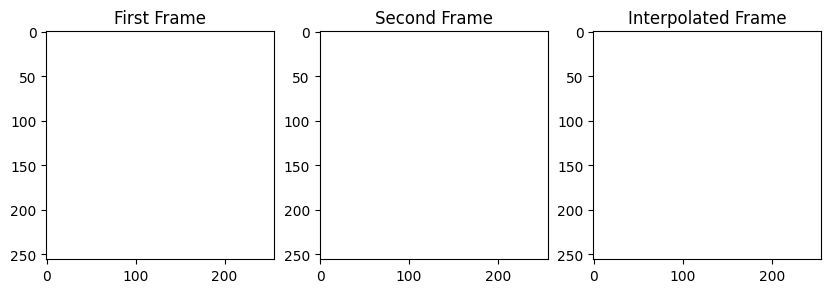

In [ ]:
import matplotlib.pyplot as plt

X1, X2, Y = load_data('Downloads/Frint_data-small/f1', 'Downloads/Frint_data-small/f2', 'Downloads/Frint_data-small/fout')

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(X1[0])
plt.title('First Frame')

plt.subplot(1, 3, 2)
plt.imshow(X2[0])
plt.title('Second Frame')

plt.subplot(1, 3, 3)
plt.imshow(Y[0])
plt.title('Interpolated Frame')

plt.show()


In [ ]:
# Directories containing the images
f1 = 'Downloads/Frint_data-small/f1'
f2 = 'Downloads/Frint_data-small/f2'
fout = 'Downloads/Frint_data-small/fout'

# Load the data
try:
    X1, X2, Y = load_data(f1, f2, fout)
except Exception as e:
    print(f"Data loading failed: {e}")

# Check the shapes
print(f"Loaded datasets with shapes: X1={X1.shape}, X2={X2.shape}, Y={Y.shape}")


X1 shape: (1000, 256, 256, 3), X2 shape: (1000, 256, 256, 3), Y shape: (1000, 256, 256, 3)
Loaded datasets with shapes: X1=(1000, 256, 256, 3), X2=(1000, 256, 256, 3), Y=(1000, 256, 256, 3)


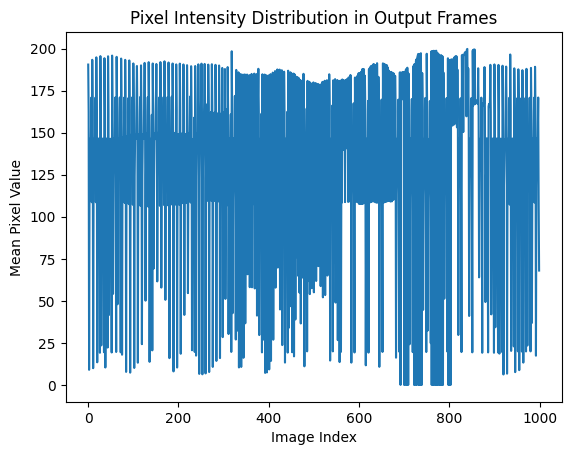

In [ ]:
import matplotlib.pyplot as plt

# Example: Plot pixel intensity distribution of Y
mean_pixel_values = [np.mean(y) for y in Y]

plt.plot(range(len(mean_pixel_values)), mean_pixel_values)
plt.xlabel("Image Index")
plt.ylabel("Mean Pixel Value")
plt.title("Pixel Intensity Distribution in Output Frames")
plt.show()
